<h1><center>Tennis Data Analysys</center></h1> 
<h2><center>Exploratory Data Analysis, Statistical Testing</center></h2>
<h3><center>Players Information</center></h3>

<center><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSvzJyS8Ca3exh3feOv-0FNdOH9ois1V-DAZAAAc_Hic9_fkdSV" align="center"/></center>

# Table of Contents
* [1 Introduction ](#1)
* [2 Import Libraries](#2)
* [3 Read Csv Files & Cleaning Data](#3)
* [4 Concatenating away_team and home_team data](#4)
* [5 Players information](#5)
  * [5.1 gender distribution](#5.1)
  * [5.2 plays distribution](#5.2)
  * [5.3 weight distribution](#5.3)
  * [5.4 height distribution](#5.4)
  * [5.5 current prize distribution](#5.5)
  * [5.6 total prize distribution](#5.6)
  * [5.7 count the number of players with each country](#5.7)
* [6 Statistics on Players Information](#6)
  * [6.1 Corrlation between players weight, height, rank and prize for men](#6.1)
  * [6.2 Corrlation between players weight, height, rank and prize for women](#6.2)
  * [6.3 Independent Samples t-test (Compare average height by gender)](#6.3)
  * [6.4 Independent Samples t-test (Compare average weight by gender)](#6.4)

<a id='1'></a>
# 1 Introduction

The objective of this project is to present an extensive analysis of the **Tennis matches Dataset**. The project is on several notbooks that every notbook will focus on diffrent subjects. This part we will analyze the the tennis players by their height, weight, gender and ... .

you can download data from this link:
<!DOCTYPE html>  
<html lang="en">  
<head>  
    <meta charset="UTF-8">  
    <meta name="viewport" content="width=device-width, initial-scale=1.0">  
    <title>Share Google Drive Link</title>  
    <script src="https://cdn.tailwindcss.com"></script>  
</head>  
<body class="flex items-center justify-center h-screen bg-gray-100">  
    <a href="https://drive.google.com/drive/folders/1Fy3j-VgZfSH6LtrTS7Be1jIKYLvoecIP?usp=drive_link" target="_blank" class="bg-blue-500 text-white font-bold py-2 px-4 rounded hover:bg-blue-700 transition">  
        View My Google Drive Folder  
    </a>  
</body>  
</html>

You can also : 
* Check the **GitHub Project Repository**


[![](https://img.shields.io/badge/Tennis%20Data%20Project-GitHub-100000?logo=github&logoColor=white)](https://github.com/HosseinFaghihi/tennis_project.git)

<a id='2'></a>
## 2 Import Libraries 

In [36]:
import os
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 
from scipy import stats   

<a id='3'></a>

## 3 Read Csv Files & Cleaning Data

In [2]:
# Define the directory and group names
base_folder = r"F:\daneshkar\my github\Tennis_project\tennis_data\csv_files"
group_names = [
    'home_team_score',
    'home_team',
    'away_team',
    'away_team_score',
    'event',
    'round',
    'season',
    'time',
    'tournament',
    'venue',
    'odds',
    'pbp',
    'statistics',
    'power',
    'votes'
]

# Initialize a dictionary to store the DataFrames
grouped_data_frames = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for group_name in group_names:
    csv_file_path = os.path.join(base_folder, f'{group_name}.csv')
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        grouped_data_frames[group_name] = df
        print(f'Successfully read {group_name}.csv')
    else:
        print(f'File {group_name}.csv not found')


Successfully read home_team_score.csv
Successfully read home_team.csv
Successfully read away_team.csv
Successfully read away_team_score.csv
Successfully read event.csv
Successfully read round.csv
Successfully read season.csv
Successfully read time.csv
Successfully read tournament.csv
Successfully read venue.csv
Successfully read odds.csv
Successfully read pbp.csv
Successfully read statistics.csv
Successfully read power.csv
Successfully read votes.csv
Group: home_team_score
Group: home_team
Group: away_team
Group: away_team_score
Group: event
Group: round
Group: season
Group: time
Group: tournament
Group: venue
Group: odds
Group: pbp
Group: statistics
Group: power
Group: votes


In [3]:
clean_away_team=grouped_data_frames['away_team'].drop_duplicates(subset=['match_id'], keep='last')
clean_away_team_score=grouped_data_frames['away_team_score'].drop_duplicates(subset=['match_id'], keep='last')
clean_event=grouped_data_frames['event'].drop_duplicates(subset=['match_id'], keep='last')
clean_home_team=grouped_data_frames['home_team'].drop_duplicates(subset=['match_id'], keep='last')
clean_home_team_score=grouped_data_frames['home_team_score'].drop_duplicates(subset=['match_id'], keep='last')
clean_odds=grouped_data_frames['odds'].drop_duplicates(subset=['choice_source_id','match_id'], keep='last')
clean_power=grouped_data_frames['power'].drop_duplicates(subset=['match_id','set_num','game_num','value','break_occurred'])
clean_pbp=grouped_data_frames['pbp'].drop_duplicates(subset=['match_id','set_id', 'game_id'])
clean_round=grouped_data_frames['round'].drop_duplicates(subset=['match_id','name'], keep='last')
clean_season=grouped_data_frames['season'].drop_duplicates(subset=['match_id'], keep='last')
clean_statistics=grouped_data_frames['statistics'].drop_duplicates(subset=['match_id','period','statistic_category_name','statistic_name'], keep='last')
clean_time=grouped_data_frames['time'].drop_duplicates(subset=['match_id'], keep='last')
clean_tournoment=grouped_data_frames['tournament'].drop_duplicates(subset=['match_id'], keep='last')
clean_venue=grouped_data_frames['venue'].drop_duplicates(subset=['match_id'], keep='last')
clean_votes=grouped_data_frames['votes'].drop_duplicates(subset=['match_id'], keep='last')

# <a id='4'></a>

# 4 Concatenating away_team and home_team data

In [4]:
# Concatenating away_team and home_team data
players_info = pd.concat([
    clean_away_team[['match_id', 'player_id', 'full_name', 'current_rank',  'country', 'plays', 'current_prize', 'total_prize', 'weight', 'height', 'birthplace', 'gender']],
    clean_home_team[['match_id', 'player_id', 'full_name', 'current_rank', 'country', 'plays', 'current_prize', 'total_prize','weight', 'height', 'birthplace', 'gender']]
]).drop_duplicates(subset=['player_id'])

# Checking for duplicates in the dataset
players_info = players_info.drop_duplicates()


# Splitting data into men and women
men = players_info[players_info['gender'] == 'M']
women = players_info[players_info['gender'] == 'F']

# <a id='5'></a>

# 5 Players information

we will analyze the the tennis players by their height, weight, gender and ... .

In [6]:
players_info

,match_id,player_id,full_name,current_rank,country,plays,current_prize,total_prize,weight,height,birthplace,gender
0,12260075,254742,"Lehečka, Jiří",24.0,Czech Republic,right-handed,763346.0,2988783.0,80.0,1.85,"Mlada Boleslav, Czechia",M
1,12260076,90080,"Khachanov, Karen",18.0,Russia,right-handed,877460.0,13580818.0,87.0,1.98,"Moscow, Russia",M
2,12260077,275923,"Alcaraz, Carlos",3.0,Spain,right-handed,1590518.0,24112308.0,68.0,1.83,"El Palmar, Murcia, Spain",M
4,12260080,57163,"Zverev, Alexander",4.0,Germany,right-handed,2676831.0,34897595.0,90.0,1.98,"Hamburg, Germany",M
7,12260085,119248,"Ruud, Casper",7.0,Norway,right-handed,1950735.0,15740860.0,77.0,1.83,"Oslo, Norway",M
...,...,...,...,...,...,...,...,...,...,...,...,...
13534,12376713,385698,"Rodríguez, Juliana",1143.0,Uruguay,NaN,1003.0,6448.0,NaN,NaN,NaN,F
13535,12376715,379635,"Moyano, Luciana",1142.0,Argentina,right-handed,1676.0,7567.0,NaN,NaN,NaN,F
13546,12376790,340585,"Tse, Elyse",1020.0,New Zealand,NaN,1788.0,4297.0,NaN,NaN,NaN,F
13549,12376807,319992,"Hanzlik, Cash",758.0,USA,NaN,825.0,10131.0,NaN,1.85,Portland,M


# <a id='5.1'></a>

# 5.1 gender distribution

In [7]:
# Printing the number of male and female players
print(f'male players: {len(men)}')
print(f'female players: {len(women)}')
print(f'unkwon players: {len(players_info[players_info['gender'].isnull()])}')
print(f'total players: {len(players_info)}')


male players: 1210
female players: 1136
unkwon players: 6
total players: 2352


# <a id='5.2'></a>

# 5.2 plays distribution

In [6]:
left_men = men[men['plays'] == 'left-handed']
right_men = men[men['plays'] == 'right-handed']
left_women = women[women['plays'] == 'left-handed']
right_women = women[women['plays'] == 'right-handed']


print(f'left handed men number: {len(left_men)}')
print(f'right handed men number: {len(right_men)}')

print(f'{len(left_men)/len(men['plays'].dropna())} percent of men are left handed')
print(f'{len(right_men)/len(men['plays'].dropna())} percent of men are right handed')

print('================================================================================')

print(f'left handed women number: {len(left_women)}')
print(f'right handed women number: {len(right_women)}')

print(f'{len(left_women)/len(women['plays'].dropna())} percent of women are left handed')
print(f'{len(right_women)/len(women['plays'].dropna())} percent of women are right handed')

left handed men number: 84
right handed men number: 568
0.12863705972434916 percent of men are left handed
0.8698315467075038 percent of men are right handed
left handed women number: 36
right handed women number: 340
0.09574468085106383 percent of women are left handed
0.9042553191489362 percent of women are right handed


# <a id='5.3'></a>

# 5.3 weight distribution

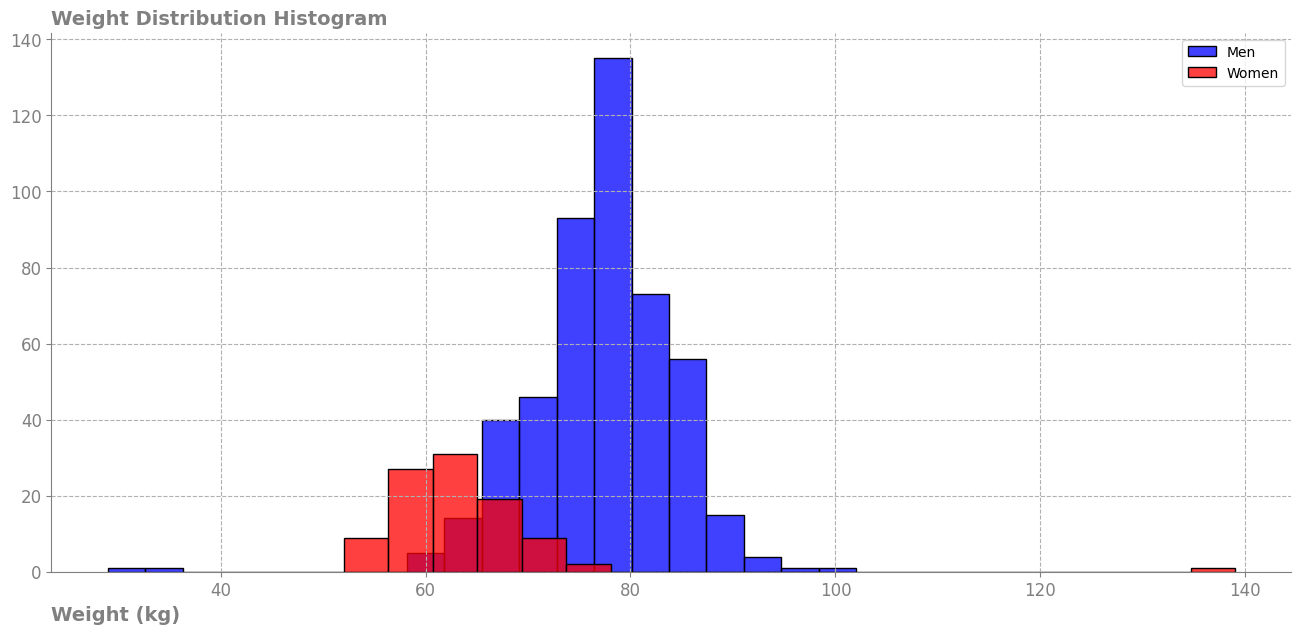

statistical analysis of men weight distribution: count    485.000000
mean      77.274227
std        7.130502
min       29.000000
25%       73.000000
50%       78.000000
75%       82.000000
max      102.000000
Name: weight, dtype: float64
statistical analysis of women weight distribution: count     98.000000
mean      63.744898
std        9.158750
min       52.000000
25%       60.000000
50%       62.000000
75%       67.000000
max      139.000000
Name: weight, dtype: float64


In [7]:
fig, ax = plt.subplots(figsize=(16, 7))

sns.histplot(men['weight'].dropna(), kde=False, color='blue', label='Men', bins=20)
sns.histplot(women['weight'].dropna(), kde=False, color='red', label='Women', bins=20)

ax.legend()

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('Weight (kg)', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('Weight Distribution Histogram', loc='left', weight='bold', fontsize=14, color='gray')

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

# statistical analysis of weight distribution
print(f'statistical analysis of men weight distribution: {men['weight'].describe()}')
print('============================================================================')
print(f'statistical analysis of women weight distribution: {women['weight'].describe()}')

# <a id='5.4'></a>

# 5.4 height distribution

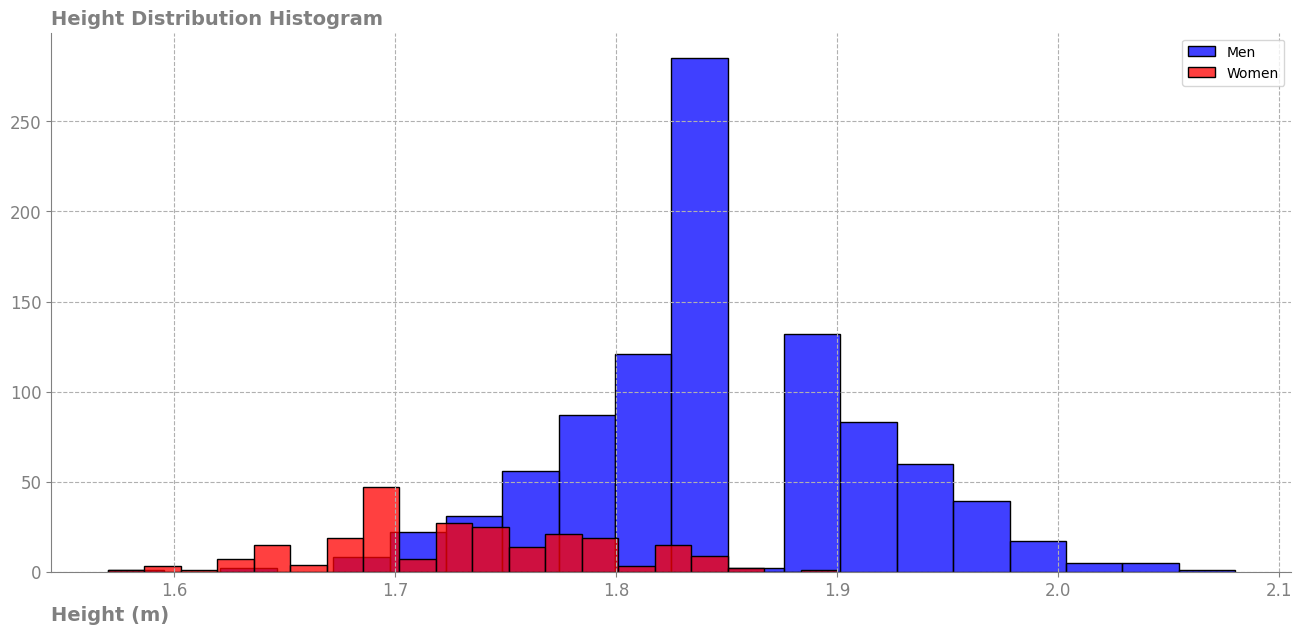

statistical analysis of men height distribution: count    957.000000
mean       1.842048
std        0.068905
min        1.570000
25%        1.800000
50%        1.850000
75%        1.880000
max        2.080000
Name: height, dtype: float64
statistical analysis of women height distribution: count    240.000000
mean       1.732417
std        0.060797
min        1.570000
25%        1.700000
50%        1.730000
75%        1.780000
max        1.900000
Name: height, dtype: float64


In [8]:
fig, ax = plt.subplots(figsize=(16, 7))

sns.histplot(men['height'].dropna(), kde=False, color='blue', label='Men', bins=20)
sns.histplot(women['height'].dropna(), kde=False, color='red', label='Women', bins=20)

ax.legend()

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('Height (m)', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('Height Distribution Histogram', loc='left', weight='bold', fontsize=14, color='gray')

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

# statistical analysis of weight distribution
print(f'statistical analysis of men height distribution: {men['height'].describe()}')
print('================================')
print(f'statistical analysis of women height distribution: {women['height'].describe()}')

# <a id='5.5'></a>

# 5.5 current prize distribution

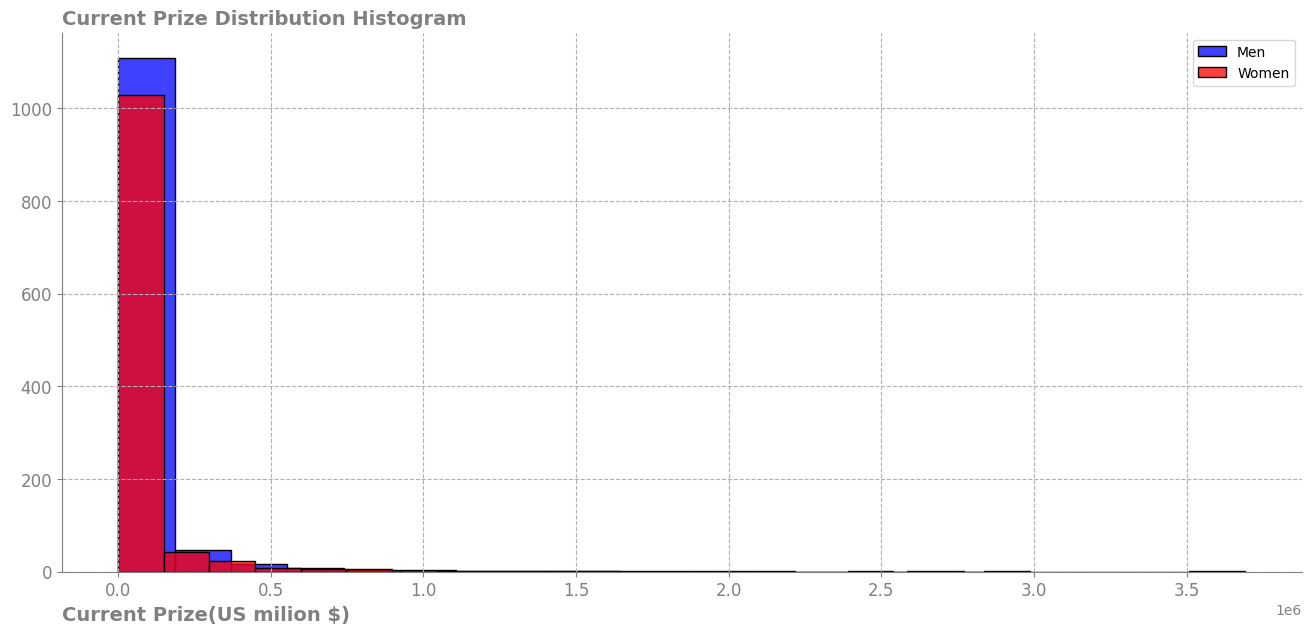

male players: count    1.195000e+03
mean     5.528674e+04
std      2.155932e+05
min      0.000000e+00
25%      9.910000e+02
50%      3.073000e+03
75%      1.323050e+04
max      3.692708e+06
Name: current_prize, dtype: float64
female players: count    1.122000e+03
mean     5.002537e+04
std      1.815505e+05
min      0.000000e+00
25%      1.089000e+03
50%      3.207500e+03
75%      1.248525e+04
max      2.986716e+06
Name: current_prize, dtype: float64
total players: count    2.323000e+03
mean     5.260552e+04
std      1.995672e+05
min      0.000000e+00
25%      1.039000e+03
50%      3.110000e+03
75%      1.286300e+04
max      3.692708e+06
Name: current_prize, dtype: float64


In [9]:
fig, ax = plt.subplots(figsize=(16, 7))

sns.histplot(men['current_prize'].dropna(), kde=False, color='blue', label='Men', bins=20)
sns.histplot(women['current_prize'].dropna(), kde=False, color='red', label='Women', bins=20)

ax.legend()

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('Current Prize(US milion $)', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('Current Prize Distribution Histogram', loc='left', weight='bold', fontsize=14, color='gray')

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

print(f'male players: {men['current_prize'].describe()}')
print('===================================================')
print(f'female players: {women['current_prize'].describe()}')
print('===================================================')
print(f'total players: {players_info['current_prize'].describe()}')



# <a id='5.6'></a>

# 5.6 total prize distribution

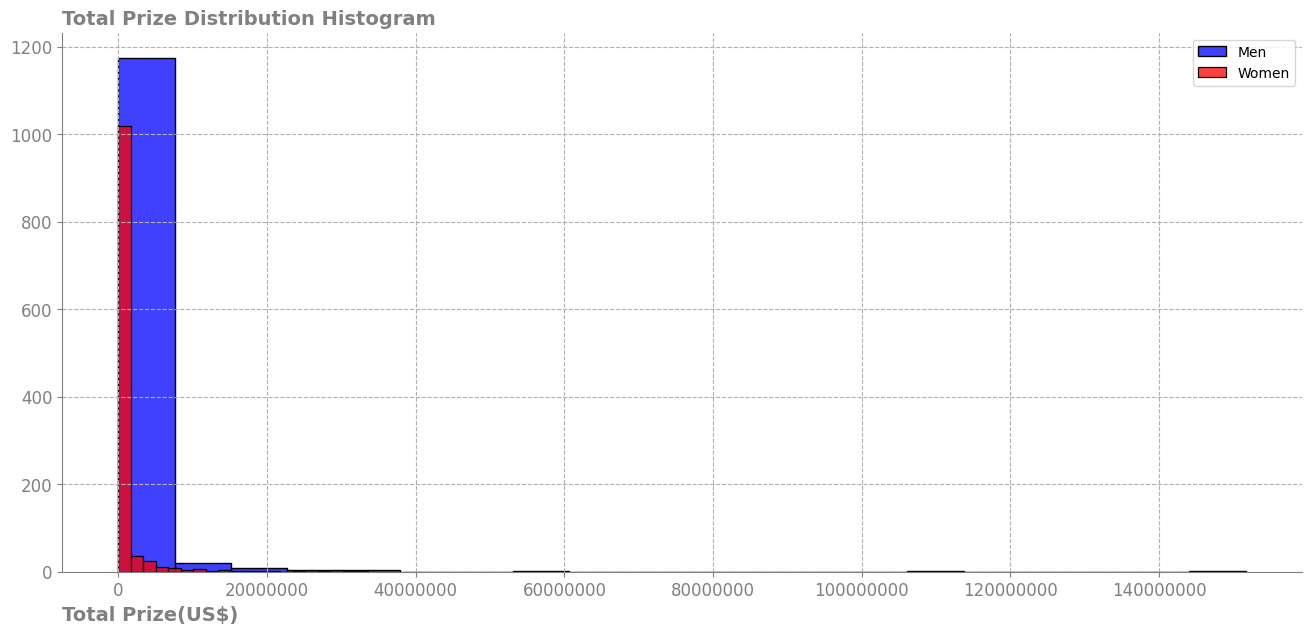

male players: count    1.210000e+03
mean     1.077705e+06
std      6.347356e+06
min      4.190000e+02
25%      9.539500e+03
50%      3.794900e+04
75%      2.264170e+05
max      1.516295e+08
Name: total_prize, dtype: float64
female players: count    1.124000e+03
mean     7.525108e+05
std      2.698360e+06
min      8.910000e+02
25%      1.092550e+04
50%      3.695400e+04
75%      2.220610e+05
max      3.352224e+07
Name: total_prize, dtype: float64
total players: count    2.340000e+03
mean     9.187484e+05
std      4.934487e+06
min      4.190000e+02
25%      9.991250e+03
50%      3.708850e+04
75%      2.251348e+05
max      1.516295e+08
Name: total_prize, dtype: float64


In [10]:
fig, ax = plt.subplots(figsize=(16, 7))

sns.histplot(men['total_prize'].dropna(), kde=False, color='blue', label='Men', bins=20)
sns.histplot(women['total_prize'].dropna(), kde=False, color='red', label='Women', bins=20)

ax.legend()

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('Total Prize(US$)', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('Total Prize Distribution Histogram', loc='left', weight='bold', fontsize=14, color='gray')

ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')

formatter = FuncFormatter(lambda x, _: f'{int(x)}')  # Format to integer  
ax.xaxis.set_major_formatter(formatter)  

ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

# Printing the total prize distribution for men and women
print(f'male players: {men['total_prize'].describe()}')
print('===================================================')
print(f'female players: {women['total_prize'].describe()}')
print('===================================================')
print(f'total players: {players_info['total_prize'].describe()}')

# <a id='5.7'></a>

# 5.7 count the number of players with each country

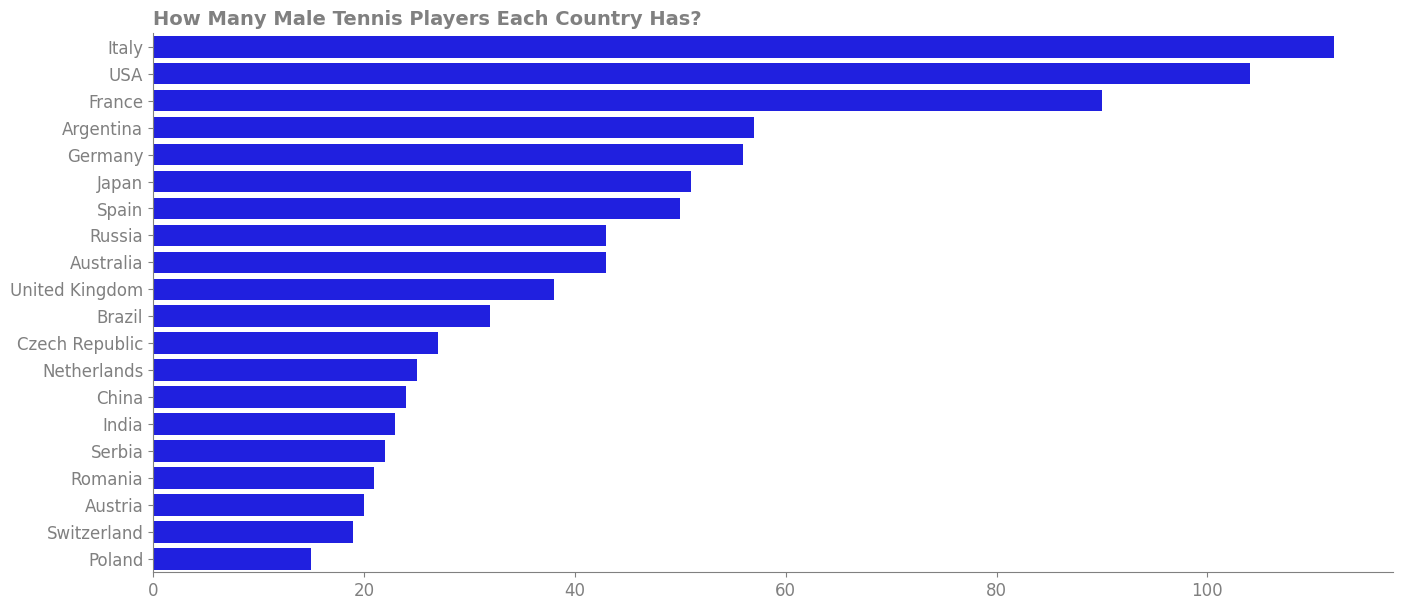

In [11]:
# Get the value counts of the countries for males
men_country = men['country'].value_counts().sort_values( ascending=False)

#plot
fig, ax = plt.subplots(figsize=(16, 7))

sns.barplot(x=men_country.head(20).values, y=men_country.head(20).index, color='blue')  

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('How Many Male Tennis Players Each Country Has?', loc='left', weight='bold', fontsize=14, color='gray')



ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

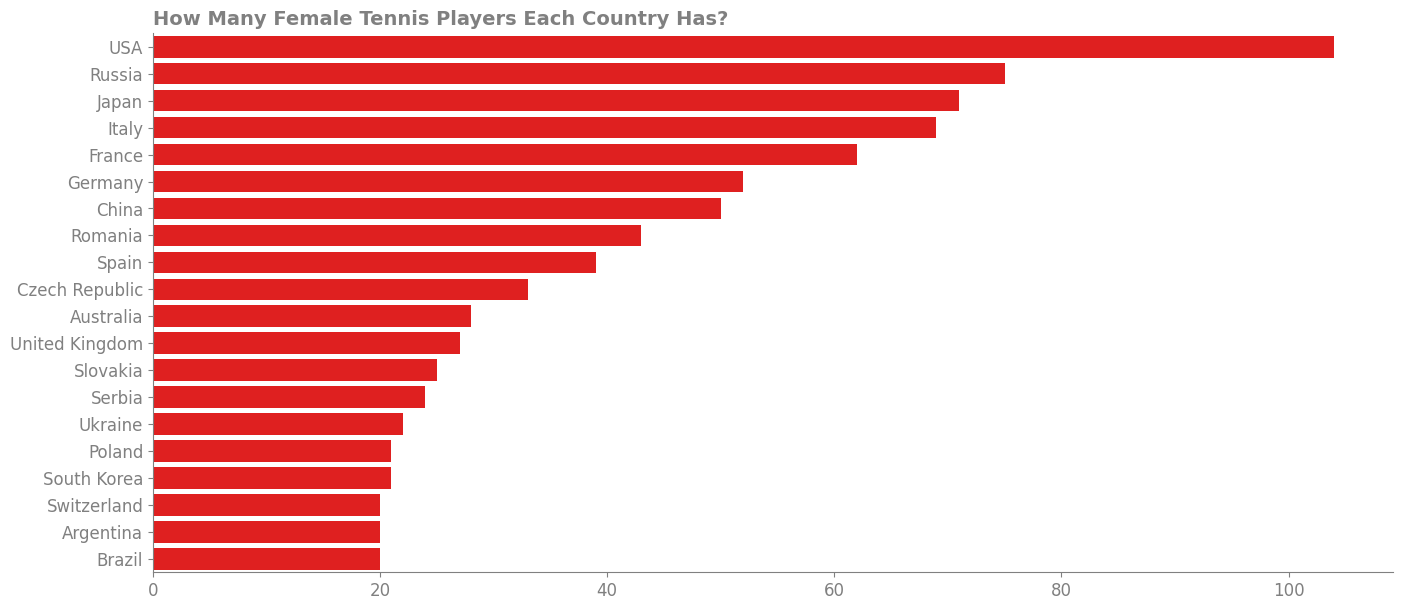

In [12]:
# Get the value counts of the countries for males
women_country = women['country'].value_counts().sort_values( ascending=False)

#plot
fig, ax = plt.subplots(figsize=(16, 7))

sns.barplot(x=women_country.head(20).values, y=women_country.head(20).index, color='red')  

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')

ax.set_xlabel('', loc='left', weight='bold', fontsize=14, color='gray')
ax.set_ylabel('',loc='bottom', weight='bold', fontsize=14, color='gray')
ax.set_title('How Many Female Tennis Players Each Country Has?', loc='left', weight='bold', fontsize=14, color='gray')



ax.tick_params(axis='x', colors='gray', labelsize='large')
ax.tick_params(axis='y', colors='gray', labelsize='large')

plt.show()

# <a id='6'></a>

# 6 Statistics on Players Information

# <a id='6.1'></a>

# 6.1 Corrlation between players weight, height, rank and prize for men

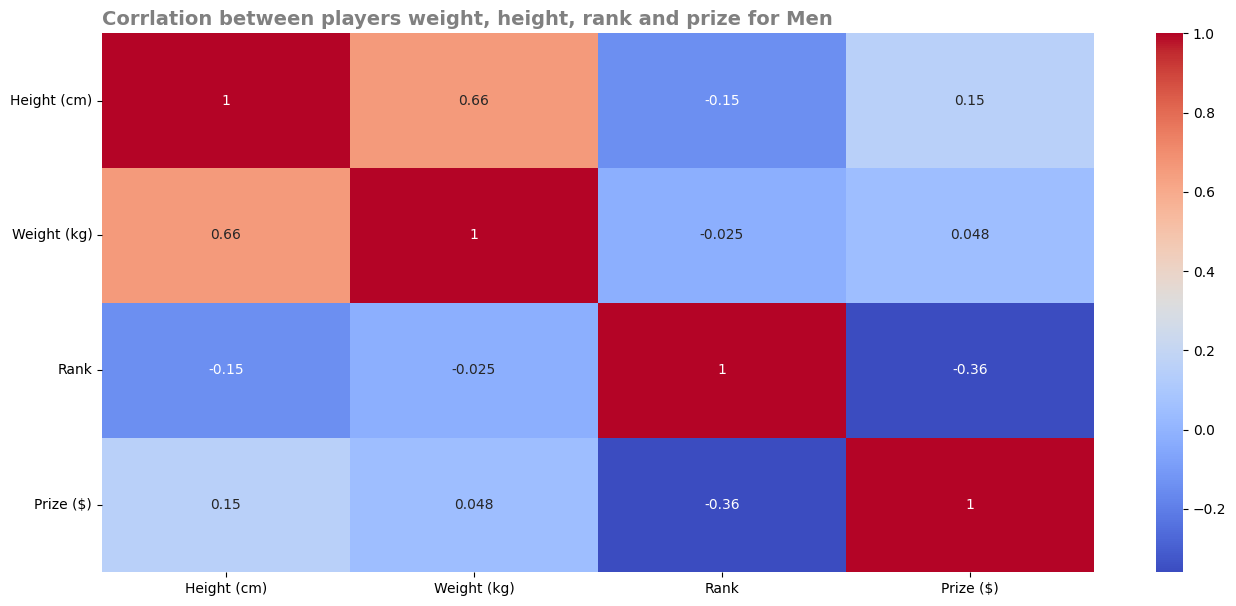

In [34]:
corrlation_matrix = men[['height','weight','current_rank','current_prize']].corr()


fig, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corrlation_matrix,annot=True,cmap='coolwarm',
            xticklabels=['Height (cm)', 'Weight (kg)', 'Rank', 'Prize ($)'],   
            yticklabels=['Height (cm)', 'Weight (kg)', 'Rank', 'Prize ($)'])

ax.set_title('Corrlation between Players Weight, Height, Rank and Prize for Men', loc='left', weight='bold', fontsize=14, color='gray')



# Rotate y-axis labels  
plt.yticks(rotation=0)  

plt.show()

# <a id='6.2'></a>

# 6.2 Corrlation between players weight, height, rank and prize for women

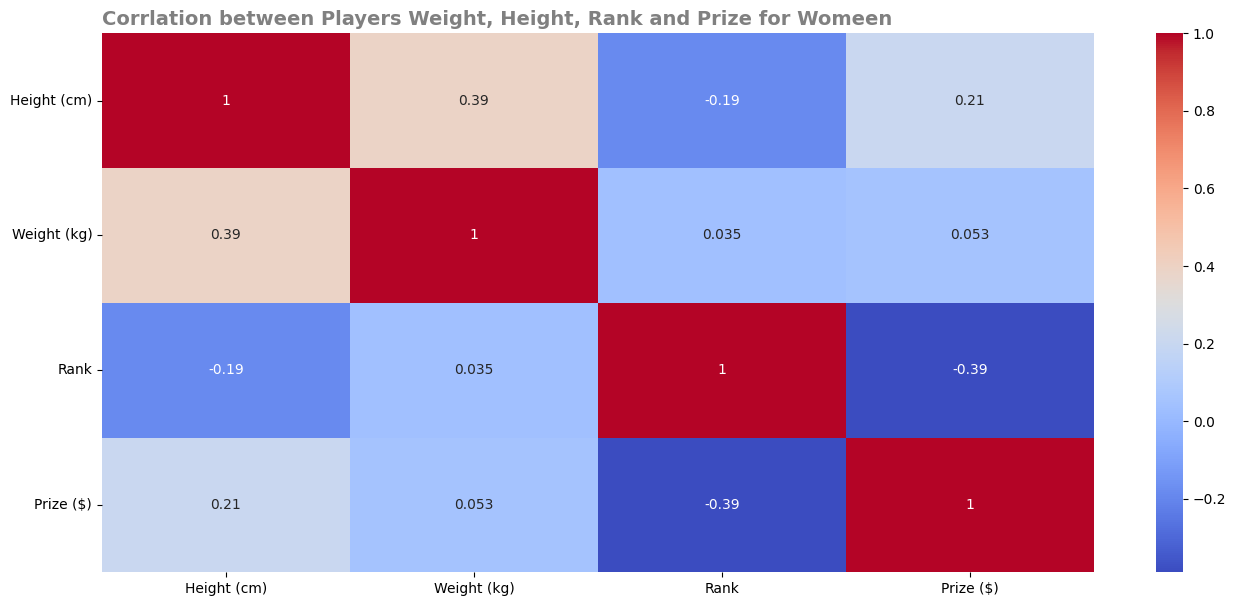

In [35]:
corrlation_matrix = women[['height','weight','current_rank','current_prize']].corr()


fig, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corrlation_matrix,annot=True,cmap='coolwarm',
            xticklabels=['Height (cm)', 'Weight (kg)', 'Rank', 'Prize ($)'],   
            yticklabels=['Height (cm)', 'Weight (kg)', 'Rank', 'Prize ($)'])

ax.set_title('Corrlation between Players Weight, Height, Rank and Prize for Womeen', loc='left', weight='bold', fontsize=14, color='gray')



# Rotate y-axis labels  
plt.yticks(rotation=0)  

plt.show()

# <a id='6.3'></a>

# 6.3 Independent Samples t-test (Compare average height by gender)

In [45]:
male_heights = men['height'].dropna() 
female_heights = women['height'].dropna()  

# Perform the t-test  
t_stat, p_value = stats.ttest_ind(male_heights, female_heights)  
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 22.544379589059993, P-value: 4.6083189061579365e-94


T-statistic Value:  22.54


A t-statistic as large as this suggests that the mean height of males is significantly higher than that of females. The larger the absolute value of the t-statistic, the more significant the difference.


P-value:4.61×10−94
 
This p-value is extremely low (much less than the conventional threshold of 0.05).
It indicates that the difference in heights between males and females is statistically significant. We would reject the null hypothesis, which states that there is no difference in heights between the two groups.

# <a id='6.4'></a>

# 6.4 Independent Samples t-test (Compare average weight by gender)

In [49]:
male_weights = men['weight'].dropna() 
female_weights = women['weight'].dropna()  

# Perform the t-test  
t_stat, p_value = stats.ttest_ind(male_weights, female_weights)  
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 16.27198198951969, P-value: 2.486049619797691e-49


T-statistic Value:  16.27


A t-statistic as large as this suggests that the mean weight of males is significantly higher than that of females. The larger the absolute value of the t-statistic, the more significant the difference.


P-value:2.48×10−49
 
This p-value is extremely low (much less than the conventional threshold of 0.05).
It indicates that the difference in weights between males and females is statistically significant. We would reject the null hypothesis, which states that there is no difference in weights between the two groups.